<div align="center">
    <h1><b>2. Preliminarna analiza podataka </b></h1>
</div>


In [70]:
library(arrow)
library(dplyr)
library(ggplot2)
library(tidyr)

In [68]:
DEVICES_NUM <- 2480
TRANSFORMED_DATASET_PATH <- "../data/nsrdb_puerto_rico_2017_transformed.parquet"
SUMMARY_STATS_PATH <- "../data/stats/summary_stats.csv"

In [ ]:
df <- read_parquet(TRANSFORMED_DATASET_PATH)

In [26]:
device_stats <- df %>%
  summarise(
    min_lat = min(lat),
    max_lat = max(lat),
    min_lon = min(lon),
    max_lon = max(lon),
    min_time = min(time_index),
    max_time = max(time_index),
  )

  device_stats

min_lat,max_lat,min_lon,max_lon,min_time,max_time
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
17.66,18.76,-67.93,-64.27,2017-01-01 00:00:00+00:00,2017-12-31 23:55:00+00:00


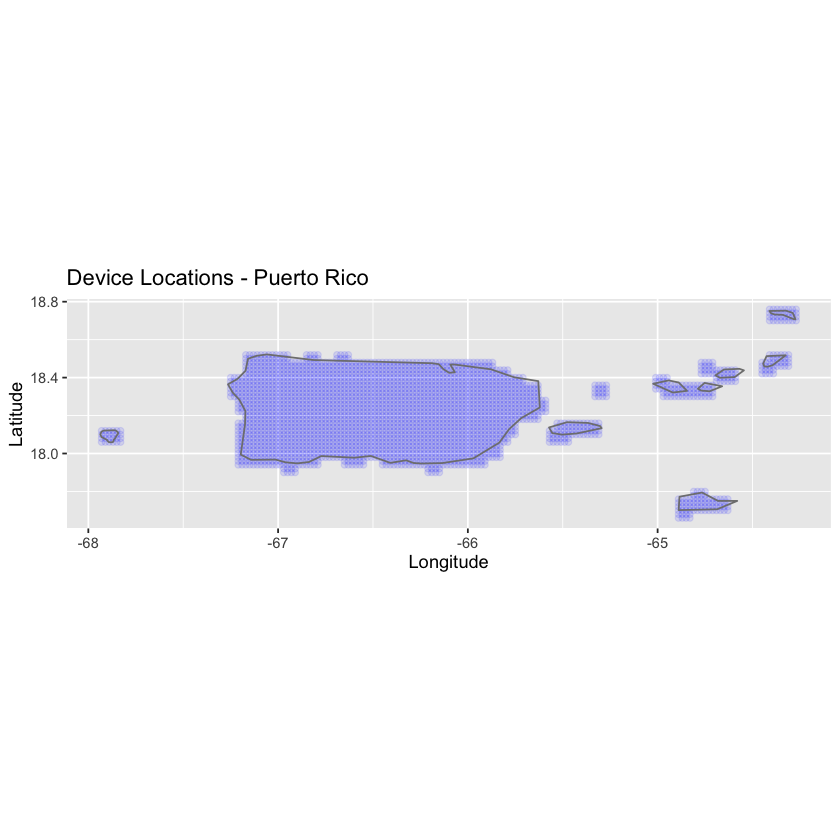

In [44]:
ggplot(df[1:DEVICES_NUM, ], aes(x = lon, y = lat)) +
  geom_point(alpha = 0.1, color = "blue") +
  borders("world") +
  coord_fixed(
    xlim = c(device_stats$min_lon, device_stats$max_lon),
    ylim = c(device_stats$min_lat, device_stats$max_lat)
  ) +
  labs(
    title = "Device Locations - Puerto Rico",
    x = "Longitude",
    y = "Latitude"
  )


<br>

---

Kao što je pokazano u *data_preparation* notebook-u, postoji ukupno **2,480** mjernih uređaja (senzora).

Na grafikonu iznad prikazan je dio planete Zemlje koji je ograničen sa dvije vrijednosti za geografsku širinu i dužinu:
1. donji lijevi ugao → (min_lon, min_lat) i
2. gornji desni ugao → (max_lon, max_lat).

Na osnovu tih granica dobijena je teritorija države Portoriko.

Prema podacima sa Wikipedije, površina Portorika iznosi **8,868** km².
Dakle, gustina senzora iznosi: 2480/8868≈0.28


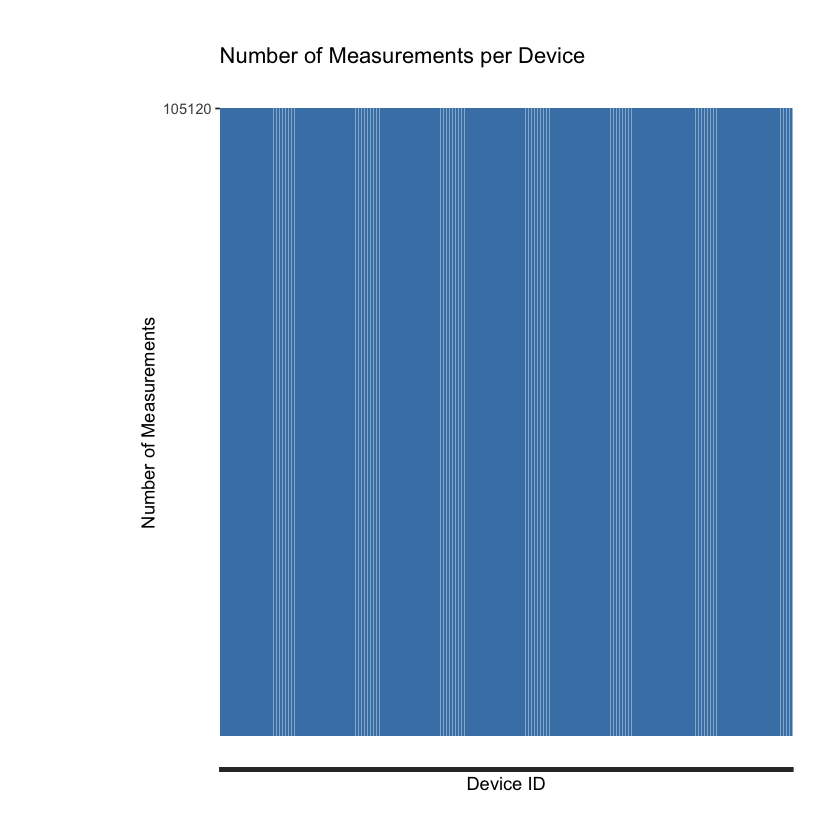

In [54]:
device_counts <- df %>%
  group_by(device_id) %>%
  summarise(count = n())

ggplot(device_counts, aes(x = factor(device_id), y = count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(
    title = "Number of Measurements per Device",
    x = "Device ID",
    y = "Number of Measurements"
  ) +
  theme(axis.text.x = element_blank()) +
  scale_y_continuous(breaks = c(105120)) +
  theme(plot.margin = margin(1, 1, 1, 3, "cm"))


<br>

---

Na grafikonu iznad prikazan je broj mjerenja po senzoru.

In [69]:

cols_to_summarise <- c(
  "air_temperature",
  "clearsky_dhi",
  "clearsky_dni",
  "clearsky_ghi",
  "dhi",
  "dni",
  "ghi",
  "solar_zenith_angle",
  "surface_albedo",
  "surface_pressure",
  "total_precipitable_water",
  "wind_speed"
)

summary_stats <- df %>%
  summarise(across(
    cols_to_summarise,
    list(min = ~min(.),
         q1 = ~quantile(., 0.25),
         median = ~median(.),
         mean = ~mean(.),
         q3 = ~quantile(., 0.75),
         max = ~max(.)),
    .names = "{.col}_{.fn}"
  ))

write.csv(summary_stats, SUMMARY_STATS_PATH, row.names = FALSE)


---

<br>


<div align="center">

| column                     | min  | q1   | median | mean           | q3   | max   |
|:--------------------------:|:----:|:----:|:------:|:--------------:|:----:|:-----:|
| air_temperature            | 14   | 25   | 26     | 26.0931079189  | 28   | 33    |
| clearsky_dhi               | 0    | 0    | 0      | 56.0448759597  | 107  | 674   |
| clearsky_dni               | 0    | 0    | 0      | 332.274664400  | 749  | 1033  |
| clearsky_ghi               | 0    | 0    | 0      | 279.440473019  | 611  | 1085  |
| dhi                        | 0    | 0    | 0      | 85.0189071322  | 120  | 710   |
| dni                        | 0    | 0    | 0      | 209.828480404  | 374  | 1033  |
| ghi                        | 0    | 0    | 0      | 220.554579904  | 424  | 1085  |
| solar_zenith_angle         | 0    | 5040 | 8900   | 6984.322117791 | 8900 | 8900  |
| surface_albedo             | 48   | 139  | 154    | 146.798017523  | 164  | 193   |
| surface_pressure           | 8700 | 9900 | 10100  | 10006.2241507  | 10200| 10300 |
| total_precipitable_water   | 989  | 3241 | 3994   | 4023.64056238  | 4781 | 8946  |
| wind_speed                 | 0    | 29   | 37     | 37.7716331796  | 46   | 241   |


<i> Tabela 2 </i>

</div>

